# Magnificent Seven ETF Analysis

### Spring 2024 Data Science Project
### By: Dhruv Dewan, Anish Nandyala, Adithya Prashanth

### Introduction

Write introduction here

In [19]:
# Libraries
import pandas as pd
import numpy as np
import yfinance as yf

# import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import pandas_ta as ta

# interactive plot stuff
import plotly.graph_objects as go

### Data Curation

Insert all data cleaning here

In [20]:
mag7_data = yf.download('MAGS')

[*********************100%%**********************]  1 of 1 completed


Describe Plot Below

/opt/anaconda3/envs/320-final/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/320-final/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Adjusted Close of Magnificent Seven ETF over time')

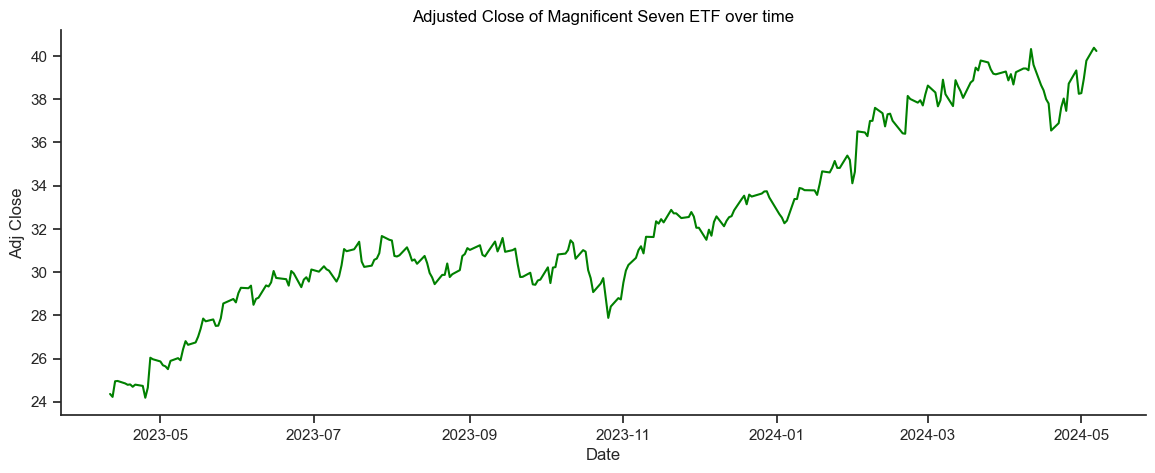

In [21]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=mag7_data, x="Date", y='Adj Close', color='green')
sns.despine()
plt.title("Adjusted Close of Magnificent Seven ETF over time", size='medium', color='black')

In [22]:
mag7_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,271.000000,271.000000,271.000000,271.000000,271.000000,2.710000e+02
mean,32.382546,32.592828,32.093830,32.344347,32.258418,7.940977e+04
std,4.071963,4.102848,3.981486,4.054952,4.102956,1.214983e+05
min,24.250000,24.615000,24.250000,24.290001,24.185017,5.000000e+02
25%,29.830000,30.105000,29.655000,29.854000,29.724968,4.250000e+03
50%,31.389999,31.500000,31.090000,31.243999,31.108959,2.040000e+04
75%,35.110001,35.449999,34.923500,35.164999,35.164999,1.235000e+05
max,40.450001,40.494400,40.064999,40.380001,40.380001,1.282400e+06


In [23]:
tsm_data = yf.download('TSM')

[*********************100%%**********************]  1 of 1 completed


### Exploratory Data Analysis

Add all hypothesis, hypothesis tests, insights taken, etc. Present 3 conclusions using 3 different statistical methods. 
Write about main characteristics of the dataset, correlated features, outliers, have one plot for each test.

In [25]:
tsm_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-10-09,5.646040,6.562691,5.646040,6.323565,3.213322,10201979
1997-10-10,7.014374,7.040944,6.363419,6.615830,3.361836,10669148
1997-10-13,6.629115,6.629115,6.443128,6.469698,3.287579,3044363
1997-10-14,6.416558,6.429843,6.031299,6.204002,3.152565,2549907
1997-10-15,5.818742,6.044584,5.805458,6.031299,3.064806,3167153


### Primary Analysis

Choose a machine learning technique to hlep answer the questions


### Visualization

Add at least one plot (labeled with legend) and explained.

### Insights and Conclusions